# 0.0 Imports

In [18]:
import pandas as pd 
from sklearn.tree           import DecisionTreeClassifier   as dt  
from sklearn.linear_model   import LogisticRegression       as lr 
from sklearn.ensemble       import RandomForestClassifier   as rf 
from sklearn.tree           import DecisionTreeClassifier   as dt
from sklearn.neighbors      import KNeighborsClassifier     as knn
from sklearn.preprocessing  import normalize
from sklearn                import metrics                  as mt 
from tqdm import tqdm

# 1.0 Data Preparation

In [3]:
class normalizer():

    def __init__(self,
                 df):
        
        self.dict_max = {c : df[c].max() for c in df.columns}


    def getDfcolumnNormalized(self, 
                              df):
        
        df_normalized = df.copy()

        for c in df.columns:

            df_normalized.loc[:, c] = df_normalized.loc[:,c].apply(lambda x: x/self.dict_max[c])

        return df_normalized 
    

    def getDfcolumnDeNormalized(self,
                                df):
        
        df_normalized = df.copy()

        for c in df.columns:

            df_normalized.loc[:, c] = df_normalized.loc[:,c].apply(lambda x: x*self.dict_max[c])

        return df_normalized 
    


In [4]:
X_test      = pd.read_csv('../data/X_test.csv') 
X_training  = pd.read_csv('../data/X_training.csv')
X_valid     = pd.read_csv('../data/X_validation.csv')
y_test      = pd.read_csv('../data/y_test.csv')
y_training  = pd.read_csv('../data/y_training.csv')
y_valid     = pd.read_csv('../data/y_validation.csv')


In [5]:
# instancia um normalizador treinado com os parametros de training
normalizer_X = normalizer(X_training)

X_test_normalized   = normalizer_X.getDfcolumnNormalized(X_test)
X_training_norm     = normalizer_X.getDfcolumnNormalized(X_training)
X_valid_norm        = normalizer_X.getDfcolumnNormalized(X_valid)


# 2.0 Model Training

In [6]:
from typing import Literal
class superModelClassifier():
    def __init__(self,
                 model,
                 principalMetric : Literal['ACCURACY', 'F1_SCORE', 'PRECISION', 'RECALL']):
        
        self.model = model 

    def fineTuning():
        ...
    
    ...


In [7]:
knn_classifier = knn()
knn_classifier.fit(X_training_norm, y_training)


## fine tuning baseado no validation 
n_neighbors_fine_tuning = [1,2,3,4,5,6,7,8,9,10]

class ExperimentClassification():

    def __init__(self,
                 training_dataset : dict = None,
                 test_dataset     : dict = None,
                 valid_dataset    : dict = None):


        self.general_metrics = []

        self.x_training = training_dataset['x']
        self.y_training = training_dataset['y']

        self.x_test = test_dataset['x']
        self.y_test = test_dataset['y']
        
        self.x_valid = valid_dataset['x']
        self.y_valid = valid_dataset['y']
        


    
    def computeMetricsSklearnModel(self,
                                   predictions_training,
                                   predictions_test,
                                   predictions_valid) -> dict:

        '''
        returns:
            metrics :{
                accuracy    : dict['training','test','valid'], 
                precision   : dict['training','test','valid'],
                recall      : dict['training','test','valid'],
                f1_score    : dict['training','test','valid']
            }
        
        '''        
            
        accuracies  = { 
                        'training'  : None,
                        'test'      : None,
                        'valid'     : None
                       }
        
        precisions  = {
                        'training'  : None,
                        'test'      : None,
                        'valid'     : None
        }
        recalls     = {
                        'training'  : None,
                        'test'      : None,
                        'valid'     : None}
        
        f1_scores   = {
                        'training'  : None,
                        'test'      : None,
                        'valid'     : None
        }    
        

        # compute accuracy
        accuracies['training']   = mt.accuracy_score(self.y_training, predictions_training)
        accuracies['test']       = mt.accuracy_score(self.y_test, predictions_test)
        accuracies['valid']      = mt.accuracy_score(self.y_valid,  predictions_valid)
        
        #compute precision
        precisions['training']  = mt.precision_score(self.y_training, predictions_training)
        precisions['test']      = mt.precision_score(self.y_test, predictions_test)
        precisions['valid']     = mt.precision_score(self.y_valid, predictions_valid)
        
        # compute recalls
        recalls['training']     = mt.recall_score(self.y_training, predictions_training)
        recalls['test']         = mt.recall_score(self.y_test, predictions_test)
        recalls['valid']        = mt.recall_score(self.y_valid, predictions_valid)
        
        # compute f1_scores
        f1_scores['training']   = mt.f1_score(self.y_training, predictions_training)
        f1_scores['test']       = mt.f1_score(self.y_test, predictions_test)
        f1_scores['valid']      = mt.f1_score(self.y_valid, predictions_valid)


        metrics = {
             'accuracy'  : accuracies,
             'precision' : precisions,
             'recall'    : recalls, 
             'f1_score'  : f1_scores
        }

        return metrics 

    def setResults(self,
                    experimentName,
                    accuracies,
                    recalls,
                    precisions, 
                    f1_scores
                ):
        
            dict_accuracies  = {data_context : accuracies[idx]  for idx, data_context in enumerate(self.data_order)}
            dict_recalls     = {data_context : recalls[idx]     for idx, data_context in enumerate(self.data_order)}
            dict_precisions  = {data_context : precisions[idx]  for idx, data_context in enumerate(self.data_order)}  
            dict_f1_scores   = {data_context : f1_scores[idx]   for idx, data_context in enumerate(self.data_order)}

            self.results[experimentName]['metrics']  = [dict_accuracies, dict_recalls, dict_f1_scores, dict_precisions]



/home/p123/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 2.1 - KNN

In [8]:
class experimentKnn(ExperimentClassification):

    def __init__(self,
                 k_neigbhors : list,
                 training_dataset : dict = None,
                 test_dataset     : dict = None,
                 valid_dataset    : dict = None,
                 verbose          : bool = True,
                 experimentName   : str = 'Experimento'
                 ):
        
        super().__init__(training_dataset,
                 test_dataset,
                 valid_dataset)
        
        self.parameters = k_neigbhors
        self.experimentName = experimentName
        self.verbose        = verbose 


    def log(self,
            message: str):
        
        print('='*45)
        print(f'{self.experimentName} : {message}')
        print('='*45)
        

    def fine_tuning_knn(self):
        ''' 
        dict_results : 
            model : model, 
            metrics : 
                training : 
                    accuracy 
                    precision
                    recall
                    f1_score
                test :  
                    ... 
        
        '''
        
        dict_results = {

        }
        
        
        for k in tqdm(self.parameters):
            experimentName = f'k_neighbors_{k}'
            currentResult = {}
            
           
            knn_classifier = knn(k)
            
            knn_classifier.fit(self.x_training, 
                               self.y_training)
            
            
            predictions_training = knn_classifier.predict(self.x_training)
            predictions_test     = knn_classifier.predict(self.x_test)
            predictions_valid    = knn_classifier.predict(self.x_valid)

            # calcula as principais metricas do modelo
            metrics = self.computeMetricsSklearnModel(
                                                        predictions_training=predictions_training, 
                                                        predictions_test=predictions_test, 
                                                        predictions_valid=predictions_valid
                                                    )
                    
            self.general_metrics.append(metrics)

            if self.verbose:
                #self.log(f"Acurácia com k = {k}: \n {metrics['accuracy']} %" )
                
                self.log(f"F1 Scre com k = {k}: \n {metrics['f1_score']} %")
                

        
        return self.general_metrics
           


In [9]:
training_dataset = {
    'x' : X_training_norm, 
    'y' : y_training
}

test_dataset = {
    'x' : X_test_normalized, 
    'y' : y_test
}


valid_dataset = {
    'x' : X_valid_norm, 
    'y' : y_valid
}


experimento_knn = experimentKnn(k_neigbhors=[1,2,3,4,5,6,7,8,9,10],
                                training_dataset=training_dataset,
                                test_dataset=test_dataset, 
                                valid_dataset=valid_dataset
                                )

resultados = experimento_knn.fine_tuning_knn()
resultados[0]

  0%|          | 0/10 [00:00<?, ?it/s]/home/p123/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
  0%|          | 0/10 [00:04<?, ?it/s]


KeyboardInterrupt: 

## 2.2 - Arvores de decisão

### 2.2.1 - DecisionTree

In [20]:
decisionTreeModel = dt(
    max_features='sqrt',
    max_depth=None,  # None means no limit on depth
    min_samples_leaf=1
    #max_depth=
)

decisionTreeModel.fit(X_training_norm, y_training)
predictions = decisionTreeModel.predict(X_test_normalized)
predictions_training = decisionTreeModel.predict(X_training_norm)

f1_dt = mt.f1_score(y_test, predictions)
acc_dt = mt.accuracy_score(y_test, predictions)
acc_tr_dt = mt.accuracy_score(y_training, predictions_training)
pre_dt = mt.precision_score(y_test, predictions)
rec_dt = mt.recall_score(y_test, predictions)

print(f'f1_score: {f1_dt}')
print(f'accuracy: {acc_tr_dt}')
print(f'accuracy: {acc_dt}')

print(f'precision: {pre_dt}')
print(f'recall: {rec_dt}')


f1_score: 0.9275807584269663
accuracy: 1.0
accuracy: 0.9362762136484765
precision: 0.9253875120413346
recall: 0.9297844258688958


### 2.2.3 - RandomForest

In [22]:
# max-feature = uma random forest é uma combinação de várias árvores de decisão, geradas baseadas em bootstrapping, para amostragem de cada 
# nova subarvore. esta metodologia busca evitar o overfitting,
#  pois cada arvore é gerada com uma amostra diferente dos dados, a quantidade de dados sera definido pelo max_samples. 
# 
# max_featres: a cada nova ramificação da arvore, 
# o modelo irá considerar apenas uma fração dos atributos disponíveis, para calculo da função de custo, e avaliar sob qual feature realizar a separação. 

randomForestModel = rf(
                        n_estimators = 100,
                        max_features = 'sqrt',
                        bootstrap    = True, 
                        max_samples  = 0.6 ,
                        n_jobs       = -1
                       )

randomForestModel.fit(X_training_norm, y_training)
predictions_test  = randomForestModel.predict(X_test_normalized)
predictions_training = randomForestModel.predict(X_training_norm)
#predictions_valid = randomForestModel.predict(X_test_normalized)


accuracy = mt.accuracy_score(y_test, predictions_test)
accuracy_training = mt.accuracy_score(y_training, predictions_training)

f1_score  = mt.f1_score(y_test, predictions_test)
precision = mt.precision_score(y_test, predictions_test)
recall = mt.recall_score(y_test, predictions_test)

print(f'acc training: {(accuracy_training)}')
print(f'acc: {(accuracy)}')

print(f'f1: {(f1_score)}')
print(f'precision: {(precision)}')
print(f'recall: {(recall)}')




/home/p123/.local/lib/python3.10/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


acc training: 0.9967317106805489
acc: 0.9632333062989997
f1: 0.9575568435131521
precision: 0.9705377315860823
recall: 0.944918609766828


**Feature importances**

<BarContainer object of 25 artists>

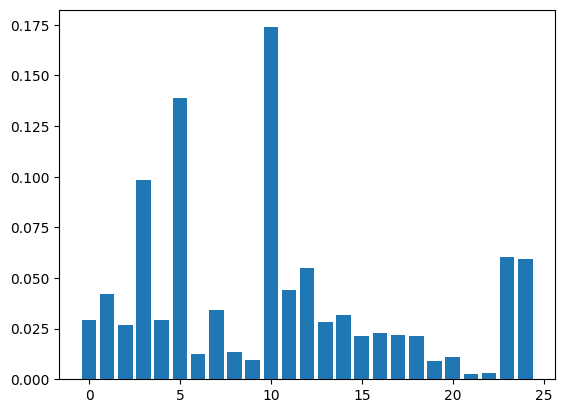

In [25]:
from matplotlib import pyplot as plt
plt.bar(range(0,len(randomForestModel.feature_importances_)),randomForestModel.feature_importances_)

## 2.3 - Logistic Regression

In [28]:
logistic_regression = lr()
logistic_regression.fit(X_training_norm, y_training)

predictions_training = logistic_regression.predict(X_training_norm)
predictions_test     = logistic_regression.predict(X_test_normalized)

accuracy_training_lr = mt.accuracy_score(y_training, predictions_training)
accuracy_test_lr = mt.accuracy_score(y_test, predictions_test)

f1_score_lr  = mt.f1_score(y_test, predictions_test)
precision_lr = mt.precision_score(y_test, predictions_test)
recall_lr = mt.recall_score(y_test, predictions_test)
print(f'acc training: {(accuracy_training_lr)}')
print(f'acc: {(accuracy_test_lr)}')
print(f'f1: {(f1_score_lr)}')
print(f'precision: {(precision_lr)}')
print(f'recall: {(recall_lr)}')

/home/p123/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


acc training: 0.8759153278632007
acc: 0.8713551925230757
f1: 0.8505808998340286
precision: 0.8675878477306003
recall: 0.8342278926528817


# 3.0 Model Evaluations